In [2]:
import warnings;warnings.simplefilter('ignore')
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
x=breast.data
y=breast.target
#读取breast cancer数据 判断肿瘤良性还是恶性 30特征，2分类

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=9)
#将数据随机分割成训练集和测试集

# 1.1预处理与缩放

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)#fit方法计算每个特征的最大值和最小值
x_train_scaled=scaler.transform(x_train)#transform方法进行实际缩放

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)#合并一步缩放

为了让监督模型能够在测试集上运行，对训练集和测试集应用完全相同的变换是很重要的.

预处理对监督学习的作用

In [15]:
import warnings;warnings.simplefilter('ignore')
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
x=breast.data
y=breast.target
#读取breast cancer数据 判断肿瘤良性还是恶性 30特征，2分类
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=9)
#将数据随机分割成训练集和测试集
from sklearn.svm import SVC
from sklearn import metrics
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
y_train_pred=svm.predict(x_train)
print("train score:"+str(svm.score(x_train,y_train)))
print("test score:"+str(svm.score(x_test,y_test)))

train score:1.0
test score:0.6271929824561403


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)#fit方法计算每个特征的最大值和最小值
x_train_scaled=scaler.transform(x_train)#transform方法进行实际缩放
x_test_scaled=scaler.transform(x_test)
svm.fit(x_train_scaled,y_train)
print("train score:"+str(svm.score(x_train_scaled,y_train)))
print("test score:"+str(svm.score(x_test_scaled,y_test)))

train score:0.9442815249266863
test score:0.956140350877193


预处理算法有很多种，但它们具有相同的接口，都包含fit和transform方法

# 1.2降维，特征提取与流形学习

# 1.2.1主成分分析

In [2]:
import warnings;warnings.simplefilter('ignore')
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
x=breast.data
y=breast.target
#读取breast cancer数据 判断肿瘤良性还是恶性 30特征，2分类
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)
#缩放数据

In [3]:
print("original shape"+str(x.shape))
print("reduced shape"+str(x_scaled.shape))

original shape(569, 30)
reduced shape(569, 30)


In [4]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)#保留数据的前两个主成分
pca.fit(x_scaled)
x_pca=pca.transform(x_scaled)

In [6]:
print("original shape"+str(x_scaled.shape))
print("reduced shape"+str(x_pca.shape))

original shape(569, 30)
reduced shape(569, 2)


In [7]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

1.2.2非负矩阵分解

1.2.3t-SNE进行流形学习

# 1.3聚类

聚类是将数据集划分成组的任务,这些组叫作簇,其目标是划分数据,使得一个簇内的数据点非常相似且不同簇内的数据点非常不同

# 1.3.1k均值聚类

In [1]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=1000,random_state=1,centers=4)
#创建数据集 关键参数样本数量，中心

In [ ]:
import pandas as pd 
xpd=pd.DataFrame(x)

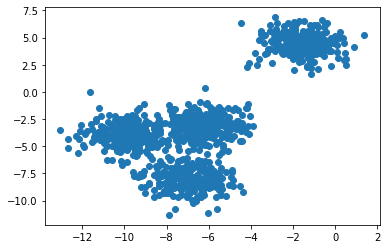

In [36]:
import matplotlib.pyplot as plt
plt.scatter(xpd.iloc[:,0],xpd.iloc[:,1])

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(xpd)
#k均值聚类
kmeans.labels_

In [42]:
ypd=pd.DataFrame(kmeans.labels_)

In [ ]:
import numpy as np
xzong=pd.concat([xpd,ypd],axis=1)
xzong.columns=np.arange(0,3)
xzong

In [49]:
x0=xzong[xzong[2]==0]
x1=xzong[xzong[2]==1]
x2=xzong[xzong[2]==2]

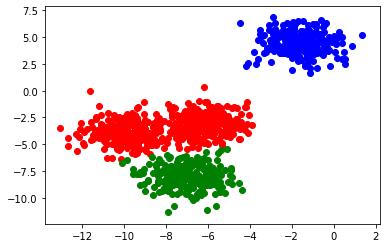

In [51]:
plt.scatter(x0.iloc[:,0],x0.iloc[:,1],c='red')
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],c='blue')
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],c='green')
plt.show()

k均值是非常流行的聚类算法，不仅相对容易理解和实现，而且运行速度也相对较快
k均值缺点之一在于依赖于随机初始化，对簇形状的假设的约束性较强，而且还要求指定所要寻找的簇的个数（现实世界中这个数字不一定知道）

# 1.3.2凝聚聚类

In [2]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=200,random_state=1,centers=3)
#创建数据集 关键参数样本数量，中心

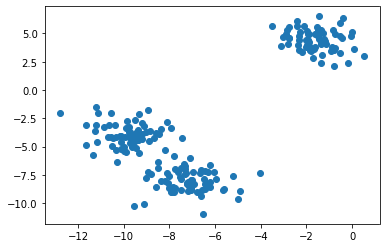

In [53]:
import pandas as pd 
xpd=pd.DataFrame(x)
import matplotlib.pyplot as plt
plt.scatter(xpd.iloc[:,0],xpd.iloc[:,1])

In [54]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=3)
agg.fit_predict(x)
agg.labels_

array([0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0,
       2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1,
       0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0,
       1, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1,
       1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0,
       2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1,
       2, 1], dtype=int32)

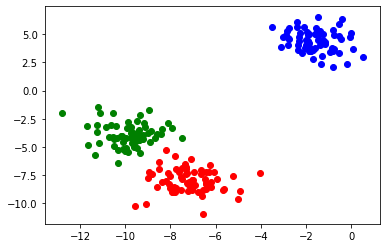

In [59]:
ypd=pd.DataFrame(agg.labels_)
zong=pd.concat([xpd,ypd],axis=1)
zong.columns=np.arange(0,3)
#zong
x0=zong[zong[2]==0]
x1=zong[zong[2]==1]
x2=zong[zong[2]==2]
plt.scatter(x0.iloc[:,0],x0.iloc[:,1],c='red')
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],c='blue')
plt.scatter(x2.iloc[:,0],x2.iloc[:,1],c='green')
plt.show()

Text(0, 0.5, 'Cluster distance')

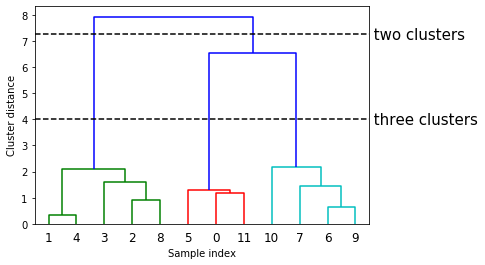

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, ward
#从scipy中导入dendrogram和ward聚类函数
X, y = make_blobs(random_state=0, n_samples=12)
#将ward聚类应用于数据数组x
#scipy的ward函数返回一个数组，指定执行凝聚聚类时跨越的距离
#绘制树状图
linkage_array = ward(X)
dendrogram(linkage_array)

# mark the cuts in the tree that signify two or three clusters
#plt.rcParams['figure.figsize']=[20,10]
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [6]:
y

array([1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1])

树状图的y轴不仅说明凝聚算法中两个簇何时合并，每个分支的长度还表示被合并的簇之间的距离
不幸的是凝聚聚类仍然无法分离two_moons数据集这样复杂的形状

# 1.3.3DBSCAN(具有噪声的基于密度的空间聚类应用)

DBSCAN有两个参数：min_samples,eps。如果在距一个给定数据点eps的距离内至少有min_samples个数据点，那么这个数据点就是核心样本。DBSCAN将彼此距离小于eps的核心样本放到一个簇中

In [76]:
from sklearn.cluster import DBSCAN
x,y=make_blobs(random_state=0,n_samples=12)
dbscan=DBSCAN()
clusters=dbscan.fit_predict(x)
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32)

所有数据点都被分配了标签-1，这代表噪声，这是eps和min_samples默认参数设置的结果

In [77]:
dbscan=DBSCAN(eps=2,min_samples=2)
clusters=dbscan.fit_predict(x)
clusters

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

使用StandardScaler或MinMaxScaler数据进行缩放之后，有时会更容易找到eps的较好取值。在使用DBSCAN时，你需要谨慎处理返回的簇分类，如果使用簇标签对另一个数据进行索引，那么使用-1表示噪声可能产生意料之外的结果

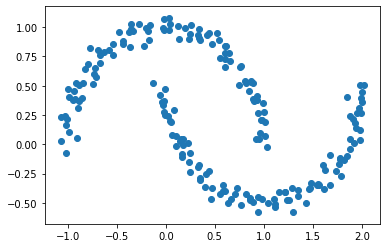

In [4]:
#实例分离复杂数据形状
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=200,random_state=0,noise=0.05)
x1=pd.DataFrame(x)
plt.scatter(x1.iloc[:,0],x1.iloc[:,1])

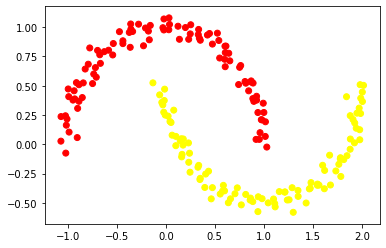

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
clusters=dbscan.fit_predict(x_scaled)
y1=pd.DataFrame(clusters)
z=pd.concat([x1,y1],axis=1)
z.columns=[0,1,'number']
d=pd.read_excel('oct002.xls',sheet_name='color')
p=z.merge(d,on='number',how='left')
p
plt.scatter(p.iloc[:,0],p.iloc[:,1],c=p.iloc[:,3])

# 聚类实例

In [122]:
import pandas as pd
data=pd.read_excel('oct002.xls',sheet_name='db')
x=data.iloc[:,1:3]
#数据缩放方法一
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x_scaled=scaler.fit_transform(x)#合并一步缩放
#数据缩放方法二
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
#聚类方法一DBSCAN
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.48,min_samples=1)
clusters=dbscan.fit_predict(x_scaled)
clusters

array([0, 1, 2, 3, 4, 5, 6, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

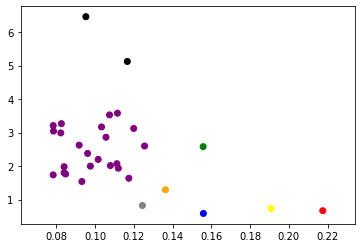

In [127]:
y=pd.DataFrame(clusters)
z=pd.concat([x,y],axis=1)
z.columns=['fg','lf','number']
d=pd.read_excel('oct002.xls',sheet_name='color')
p=z.merge(d,on='number',how='left')
p
plt.scatter(p.iloc[:,0],p.iloc[:,1],c=p.iloc[:,3])

In [125]:
#聚类方法二凝聚聚类
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=8)
agg.fit_predict(x_scaled)
agg.labels_

array([3, 3, 1, 6, 1, 4, 1, 4, 2, 0, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 0, 7,
       2, 7, 7, 7, 5, 5, 5, 5, 7], dtype=int32)

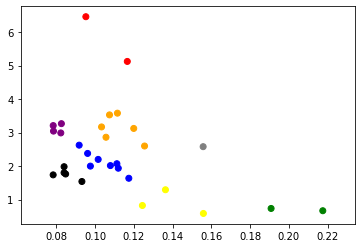

In [126]:
y=pd.DataFrame(agg.labels_)
z=pd.concat([x,y],axis=1)
z.columns=['fg','lf','number']
d=pd.read_excel('oct002.xls',sheet_name='color')
p=z.merge(d,on='number',how='left')
p
plt.scatter(p.iloc[:,0],p.iloc[:,1],c=p.iloc[:,3])